In [1]:
import sys
import os.path
sys.path.append('/Users/abadarinath/Applications/anaconda/envs/UdacityNanoCar/lib/python3.5/site-packages')
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import pickle

CAMERA_CAL_DIRECTORY = './camera_cal/'

In [10]:
def readImagesFromDir(dirPath,rgb=False):
    allDirfiles = [dirPath+f for f in listdir(dirPath) if isfile(join(dirPath, f)) and f.endswith('.jpg')]
    result = []
    for i in range(len(allDirfiles)):
        if rgb:
            bgr_img = cv2.imread(os.path.abspath(allDirfiles[i]))
            b,g,r = cv2.split(bgr_img)       # get b,g,r
            result.append(cv2.merge([r,g,b]))
        else:
            result.append(cv2.imread(os.path.abspath(allDirfiles[i])))
    return result

In [17]:
def displayImages(imgArray,isGray=False):
    plt.figure()
    for i in range(len(imgArray)):
        if isGray:
            plt.imshow(imgArray[i], cmap='gray')
            plt.show()
        else:
            plt.imshow(imgArray[i])
            plt.show()

In [11]:
# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    # draw each bounding box on your image copy using cv2.rectangle()
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # return the image copy with boxes drawn
    return draw_img # Change this line to return image copy with boxes

In [42]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256), debug=False):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    
    # Plot a figure with all three bar charts
    if debug:
        fig = plt.figure(figsize=(12,3))
        plt.subplot(131)
        plt.bar(bin_centers, rhist[0])
        plt.xlim(0, 256)
        plt.title('R Histogram')
        plt.subplot(132)
        plt.bar(bin_centers, ghist[0])
        plt.xlim(0, 256)
        plt.title('G Histogram')
        plt.subplot(133)
        plt.bar(bin_centers, bhist[0])
        plt.xlim(0, 256)
        plt.title('B Histogram')
        fig.tight_layout()
        plt.show()
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

In [39]:
file = open(CAMERA_CAL_DIRECTORY+"dist_pickle.p",'rb')
distortion = pickle.load(file)
file.close()
def unDistortImage(img,debug=False):
    global distortion
    global file
    dst = cv2.undistort(img, distortion['mtx'], distortion['dist'], None, distortion['mtx'])
    if debug:
        print("before image")
        displayImages([img])
        print("undistorted image")
        displayImages([dst])
    return dst

In [40]:
def cropHorizonInImage(img,debug=False):
    img_size = (img.shape[1], img.shape[0])
    newImg = img[img_size[1]/2:img_size[1], 0:img_size[0]] # Crop from x, y, w, h -> 100, 200, 300, 400
    # NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
    if debug:
        displayImages([newImg])
    return newImg

In [ ]:
def extractFeatures(img, debug=False):
    
    rhist, ghist, bhist, bin_centers, hist_features = color_hist(croppedImg,debug=debug)
    
    

In [ ]:
def trainingPipeline(img,debug=False):
    extractFeatures(img,debug=debug)

In [ ]:
testImgs = readImagesFromDir('./test_images/',True)

for i in range(1):#len(testImgs)):
    img = testImgs[i]
    result = pipeline(img, True)

In [36]:
def pipeline(img,debug=False):
    orgImg = img
    unDistortedImg = unDistortImage(orgImg,debug=False)
    croppedImg = cropHorizonInImage(unDistortedImg,debug=False)
    
    result = croppedImg
    if debug:
        print("Orignial image")
        displayImages([orgImg])
        print("final result")
        displayImages([croppedImg])
        print("********************************************************************************************************")
        
    return result

/Users/abadarinath/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


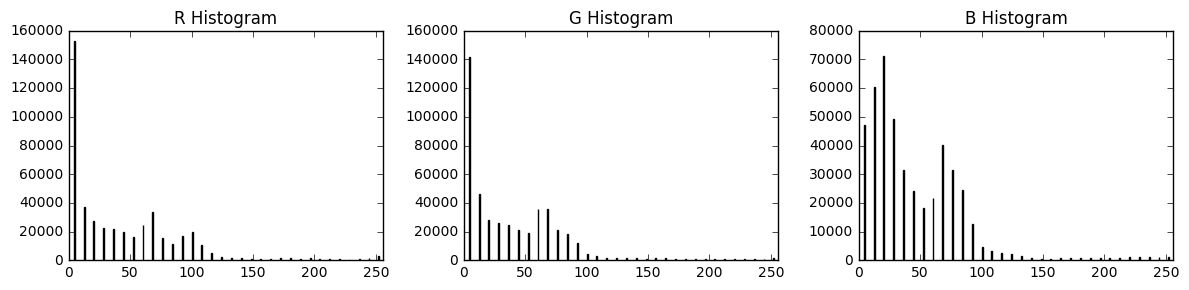

Orignial image


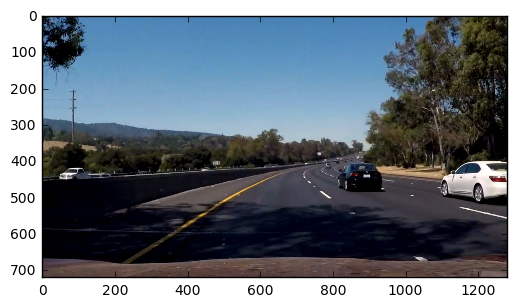

final result


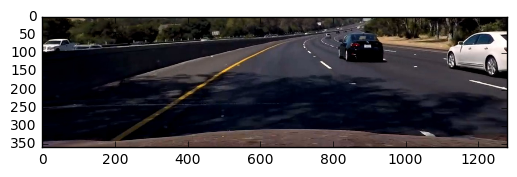

********************************************************************************************************


In [43]:
testImgs = readImagesFromDir('./test_images/',True)

for i in range(1):#len(testImgs)):
    img = testImgs[i]
    result = pipeline(img, True)